In [8]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import json

from collections import defaultdict
from tqdm import tqdm

from pathlib import Path
from typing import List, Dict, Tuple, Union, Callable, Optional, Any

In [21]:

model_sizes = [300,400,500,600,700,800,900,1000]
model_sizes = [300,400,500,600,700,800,900,1000, 2000, 3000, 5000]
seeds = [17, 21, 42, 81, 123]
meta_data = Path("../surrogates/meta/run/cifar10/predictors/xgb/")

In [22]:
def filter_metrics(metrics: Dict) -> Dict: 
    filtered_metrics = {}
    valid_metrics = ["mae", "rmse", "pearson", "spearman", "kendalltau"]
    for key in metrics: 
        if key in valid_metrics: 
            filtered_metrics[key] = metrics[key]
        
    return filtered_metrics



def collect_metrics(meta_data: Path, model_sizes: List[int], seeds: List[int], type: str) -> Dict[int, Dict[int, Dict[str, float]]]:
    train_size_seed_errors = defaultdict(dict)
    meta_data = meta_data / type
    for model_size in model_sizes: 
        for seed in seeds:
            json_path = meta_data / str(seed) / str(model_size) / "errors.json"
            with open(json_path, "r") as file:
                errors = json.load(file)
                
            filtered_metrics = filter_metrics(errors[1])
            train_size_seed_errors[model_size][seed] = filtered_metrics
            
    return train_size_seed_errors

In [23]:
train_time_metrics = collect_metrics(meta_data, model_sizes, seeds, "train_time")
val_acc_metrics = collect_metrics(meta_data, model_sizes, seeds, "val_accuracy")

In [24]:
train_time_metrics

defaultdict(dict,
            {300: {17: {'mae': 401.4287564086914,
               'rmse': 530.7557215096225,
               'pearson': 0.6181705898186155,
               'spearman': 0.5869503280534781,
               'kendalltau': 0.4145836070638403},
              21: {'mae': 337.20859619140623,
               'rmse': 438.60645170405843,
               'pearson': 0.6854493754322127,
               'spearman': 0.7209208149212253,
               'kendalltau': 0.52697760524262},
              42: {'mae': 366.7909103393555,
               'rmse': 497.95849466543524,
               'pearson': 0.5204886165893968,
               'spearman': 0.5099396003978298,
               'kendalltau': 0.35601563203748154},
              81: {'mae': 309.83067901611327,
               'rmse': 400.41777788446467,
               'pearson': 0.6822965268869845,
               'spearman': 0.6534705902964867,
               'kendalltau': 0.4763686976191765},
              123: {'mae': 439.0289907836914,
       

In [25]:
def get_avg_metrics(metrics: Dict) -> Dict: 
    
    avg_metrics = {}
    for model_size in metrics.keys(): 
        avg_metrics[model_size] = {}

        for seed in metrics[model_size].keys():
            for metric in metrics[model_size][seed].keys():
                avg_metric = "avg_"+metric
                if avg_metric not in avg_metrics[model_size]:
                    avg_metrics[model_size][avg_metric]= 0
                
                avg_metrics[model_size][avg_metric] += metrics[model_size][seed][metric]

        
    seed_len = len(metrics[model_size].keys())
    
    for model_size in avg_metrics.keys():
        for metric in avg_metrics[model_size].keys():
            avg_metrics[model_size][metric] = avg_metrics[model_size][metric] / seed_len
            
    
    return avg_metrics
        

In [26]:
avg_time_metrics = get_avg_metrics(train_time_metrics)
avg_acc_metrics = get_avg_metrics(val_acc_metrics)



In [27]:

acc_avg_mae = {size: avg_acc_metrics[size]["avg_mae"] for size in avg_acc_metrics.keys()}
acc_avg_rmse = {size: avg_acc_metrics[size]["avg_rmse"] for size in avg_acc_metrics.keys()}
acc_avg_pearson = {size: avg_acc_metrics[size]["avg_pearson"] for size in avg_acc_metrics.keys()}
acc_avg_spearman = {size: avg_acc_metrics[size]["avg_spearman"] for size in avg_acc_metrics.keys()} 
acc_avg_kendalltau = {size: avg_acc_metrics[size]["avg_kendalltau"] for size in avg_acc_metrics.keys()}


In [28]:
time_avg_mae = {size: avg_time_metrics[size]["avg_mae"] for size in avg_time_metrics.keys()}
time_avg_rmse = {size: avg_time_metrics[size]["avg_rmse"] for size in avg_time_metrics.keys()}
time_avg_pearson = {size: avg_time_metrics[size]["avg_pearson"] for size in avg_time_metrics.keys()}
time_avg_spearman = {size: avg_time_metrics[size]["avg_spearman"] for size in avg_time_metrics.keys()}
time_avg_kenalltau = {size: avg_time_metrics[size]["avg_kendalltau"] for size in avg_time_metrics.keys()}

In [29]:
time_avg_spearman

{300: 0.5874657953179835,
 400: 0.6203467938090268,
 500: 0.651364848498605,
 600: 0.7051230875307989,
 700: 0.6971221594127696,
 800: 0.7267136147231887,
 900: 0.7636448110209907,
 1000: 0.7610404579852635,
 2000: 0.8337321296683008,
 3000: 0.8698746485745309,
 5000: 0.8785869930594092}

In [30]:
acc_avg_spearman

{300: 0.5667725067155895,
 400: 0.5620671874847999,
 500: 0.5866666687349048,
 600: 0.6704924409445814,
 700: 0.6687806222333501,
 800: 0.6683679051943126,
 900: 0.6448371666609691,
 1000: 0.6619609127388291,
 2000: 0.7551278162172073,
 3000: 0.7572181181410981,
 5000: 0.7614913634052343}

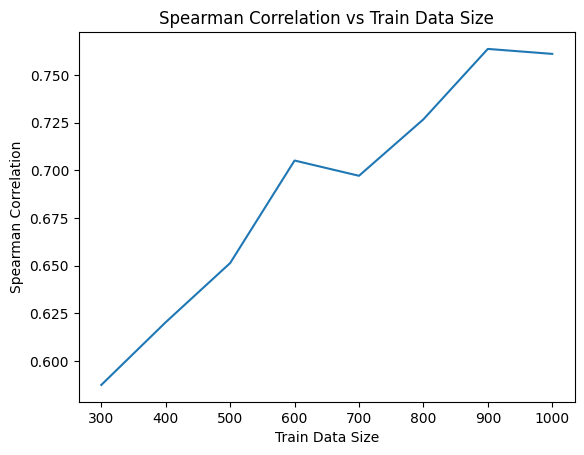

In [19]:
import matplotlib.pyplot as plt

# Sample dictionary with keys as x-axis and values as y-axis

# Extract keys and values from the dictionary
keys = list(time_avg_spearman.keys())
values = list(time_avg_spearman.values())

# Create a bar plot using matplotlib
plt.plot(keys, values)

# Add labels and a title
plt.xlabel("Train Data Size")
plt.ylabel("Spearman Correlation")
plt.title("Spearman Correlation vs Train Data Size")

# Show the plot
plt.show()


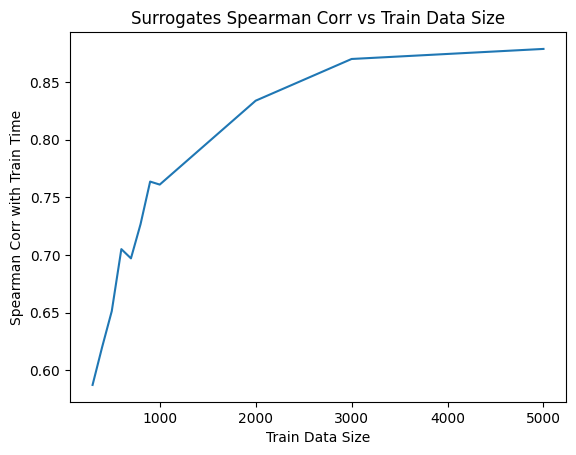

In [33]:
import matplotlib.pyplot as plt

# Sample dictionary with keys as x-axis and values as y-axis

# Extract keys and values from the dictionary
keys = list(time_avg_spearman.keys())
values = list(time_avg_spearman.values())

# Create a bar plot using matplotlib
plt.plot(keys, values)

# Add labels and a title
plt.xlabel("Train Data Size")
plt.ylabel("Spearman Corr with Train Time")
plt.title("Surrogates Spearman Corr vs Train Data Size")

# Show the plot
plt.show()


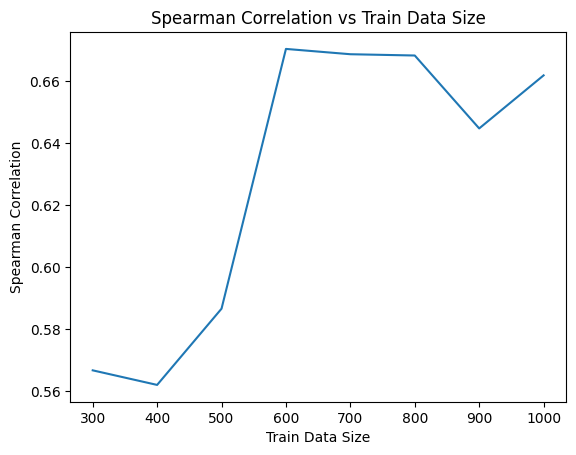

In [20]:
import matplotlib.pyplot as plt

# Sample dictionary with keys as x-axis and values as y-axis

# Extract keys and values from the dictionary
keys = list(acc_avg_spearman.keys())
values = list(acc_avg_spearman.values())

# Create a bar plot using matplotlib
plt.plot(keys, values)

# Add labels and a title
plt.xlabel("Train Data Size")
plt.ylabel("Spearman Correlation")
plt.title("Spearman Correlation vs Train Data Size")

# Show the plot
plt.show()


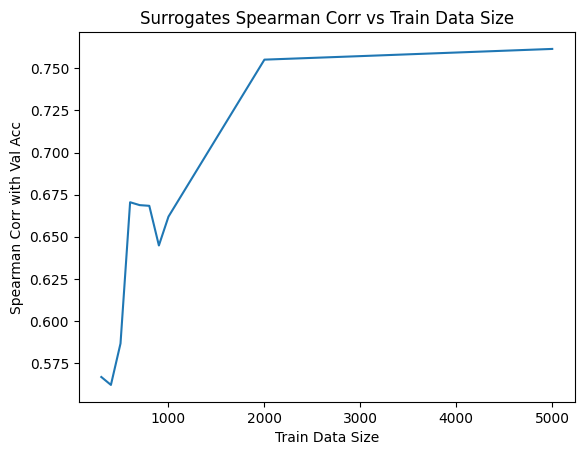

In [35]:
import matplotlib.pyplot as plt

# Sample dictionary with keys as x-axis and values as y-axis

# Extract keys and values from the dictionary
keys = list(acc_avg_spearman.keys())
values = list(acc_avg_spearman.values())

# Create a bar plot using matplotlib
plt.plot(keys, values)

# Add labels and a title
plt.xlabel("Train Data Size")
plt.ylabel("Spearman Corr with Val Acc")
plt.title("Surrogates Spearman Corr vs Train Data Size")

# Show the plot
plt.show()


## I have decided to pick the model with training data size 20 to make Multi Objective Search.